# ANOVA (Analysis of Variance)

## Pengantar, Konsep, dan Penerapan dengan Studi Kasus

### Bagian 1: Pengantar ANOVA

ANOVA (Analysis of Variance) adalah metode statistik yang digunakan untuk membandingkan rata-rata (mean) dari tiga kelompok atau lebih untuk menentukan apakah ada perbedaan yang signifikan di antara mereka. ANOVA sangat berguna dalam situasi di mana kita ingin menguji efek dari satu atau lebih faktor terhadap suatu variabel tertentu.

Contoh penggunaan ANOVA:
- Apakah ada perbedaan hasil panen antara beberapa jenis pupuk?
- Apakah metode pengajaran yang berbeda memengaruhi nilai siswa?
- Apakah performa algoritma berbeda pada dataset yang berbeda?

Tujuan utama ANOVA adalah untuk menguji hipotesis bahwa semua kelompok memiliki rata-rata yang sama (hipotesis nol) melawan hipotesis alternatif bahwa setidaknya satu kelompok memiliki rata-rata yang berbeda.

### Bagian 2: Jenis-jenis ANOVA

Ada beberapa jenis ANOVA, tetapi kita akan fokus pada dua yang paling umum:
1. **ANOVA Satu Arah (One-Way ANOVA)**: Digunakan untuk membandingkan rata-rata dari beberapa kelompok berdasarkan satu faktor. Misalnya, membandingkan nilai siswa dari tiga metode pengajaran berbeda.
2. **ANOVA Dua Arah (Two-Way ANOVA)**: Digunakan untuk membandingkan rata-rata berdasarkan dua faktor sekaligus, misalnya metode pengajaran dan tingkat kelas siswa.

### Bagian 3: Asumsi ANOVA

Sebelum menggunakan ANOVA, ada beberapa asumsi yang harus dipenuhi:
1. **Independensi Pengamatan**: Data dalam setiap kelompok harus independen satu sama lain (tidak saling memengaruhi).
2. **Normalitas**: Data dalam setiap kelompok harus mengikuti distribusi normal. Kita bisa memeriksanya dengan tes seperti Shapiro-Wilk atau dengan visualisasi seperti histogram.
3. **Homogenitas Varians**: Varians (penyebaran data) antar kelompok harus sama. Kita bisa memeriksanya dengan tes Levene.

Jika asumsi ini tidak terpenuhi, hasil ANOVA mungkin tidak valid, dan kita perlu metode lain.

### Bagian 4: Langkah-langkah ANOVA

Berikut langkah-langkah melakukan ANOVA:
1. **Merumuskan Hipotesis**:
   - Hipotesis Nol (H0): Semua kelompok memiliki rata-rata yang sama.
   - Hipotesis Alternatif (H1): Setidaknya satu kelompok memiliki rata-rata yang berbeda.
2. **Menghitung Statistik F**: Statistik F mengukur rasio varians antar kelompok terhadap varians dalam kelompok.
3. **Menentukan P-value**: P-value menunjukkan probabilitas bahwa H0 benar. Jika p-value < 0.05, kita tolak H0.
4. **Membuat Kesimpulan**: Berdasarkan p-value, kita putuskan apakah ada perbedaan signifikan.

### Bagian 5: Penerapan dalam Python

#### Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Contoh sederhana ANOVA satu arah dengan Python
Data: Nilai siswa dari tiga metode pengajaran

In [ ]:
# Dataset
metode_a = [85, 87, 90, 88, 86]
metode_b = [78, 80, 82, 79, 81]
metode_c = [92, 94, 91, 93, 90]

#### Menggabungkan data ke dalam satu list untuk ANOVA

In [ ]:
data = metode_a + metode_b + metode_c
kelompok = ['Metode A']*5 + ['Metode B']*5 + ['Metode C']*5
df = pd.DataFrame({'Nilai': data, 'Kelompok': kelompok})

In [ ]:
data

[85, 87, 90, 88, 86, 78, 80, 82, 79, 81, 92, 94, 91, 93, 90]

In [ ]:
kelompok

['Metode A',
 'Metode A',
 'Metode A',
 'Metode A',
 'Metode A',
 'Metode B',
 'Metode B',
 'Metode B',
 'Metode B',
 'Metode B',
 'Metode C',
 'Metode C',
 'Metode C',
 'Metode C',
 'Metode C']

In [ ]:
df

,Nilai,Kelompok
0,85,Metode A
1,87,Metode A
2,90,Metode A
3,88,Metode A
4,86,Metode A
5,78,Metode B
6,80,Metode B
7,82,Metode B
8,79,Metode B
9,81,Metode B


#### Visualisasi data dengan boxplot

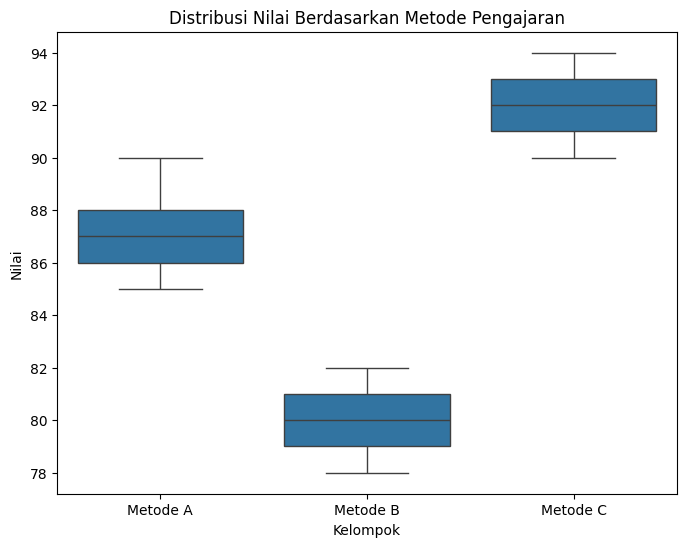

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Kelompok', y='Nilai', data=df)
plt.title('Distribusi Nilai Berdasarkan Metode Pengajaran')
plt.show()

#### Visualisasi data dengan histogram

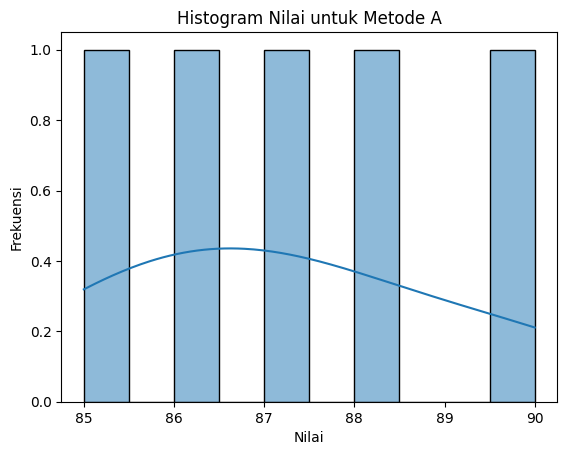

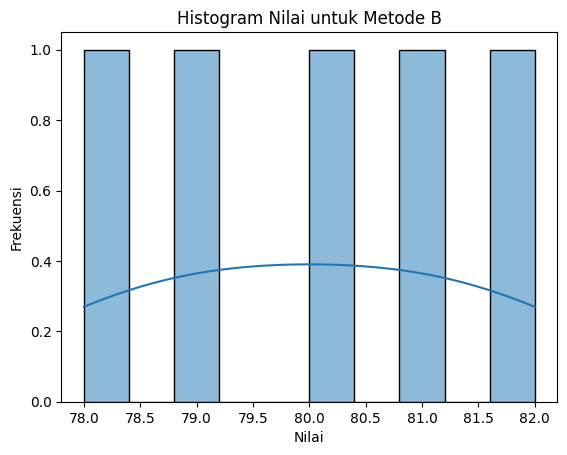

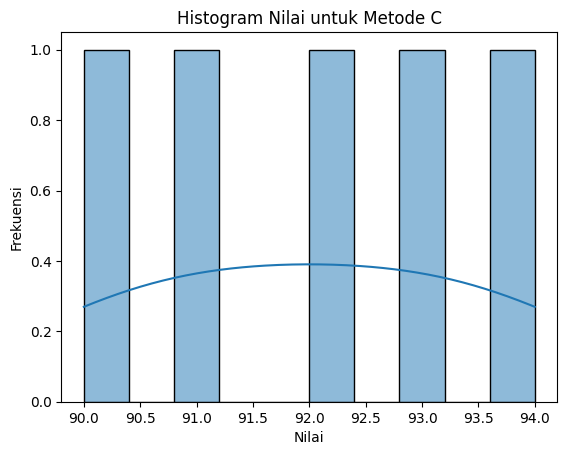

In [ ]:
sns.histplot(data=df[df['Kelompok'] == 'Metode A'], x='Nilai', bins=10, kde=True)
plt.title('Histogram Nilai untuk Metode A')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

sns.histplot(data=df[df['Kelompok'] == 'Metode B'], x='Nilai', bins=10, kde=True)
plt.title('Histogram Nilai untuk Metode B')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

sns.histplot(data=df[df['Kelompok'] == 'Metode C'], x='Nilai', bins=10, kde=True)
plt.title('Histogram Nilai untuk Metode C')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

#### Melakukan ANOVA satu arah

In [ ]:
f_stat, p_value = stats.f_oneway(metode_a, metode_b, metode_c)
print(f"Statistik F: {f_stat}")
print(f"P-value: {p_value}")

Statistik F: 62.896551724137694
P-value: 4.362370887030977e-07


#### Interpretasi

In [ ]:
if p_value < 0.05:
    print("Tolak H0: Ada perbedaan signifikan antara metode pengajaran.")
else:
    print("Gagal tolak H0: Tidak ada perbedaan signifikan antara metode pengajaran.")

Tolak H0: Ada perbedaan signifikan antara metode pengajaran.


### Bagian 6: Contoh Studi Kasus

### Studi Kasus 1: Efektivitas Pupuk pada Pertumbuhan Tanaman

Masalah: Seorang petani ingin tahu apakah tiga jenis pupuk (Pupuk A, B, dan C) memberikan hasil yang berbeda pada tinggi tanaman setelah 30 hari.

In [ ]:
pupuk_a = [25, 28, 27, 26, 29]  # Tinggi tanaman (cm)
pupuk_b = [30, 32, 31, 33, 34]
pupuk_c = [22, 24, 23, 25, 21]

#### Visualisasi

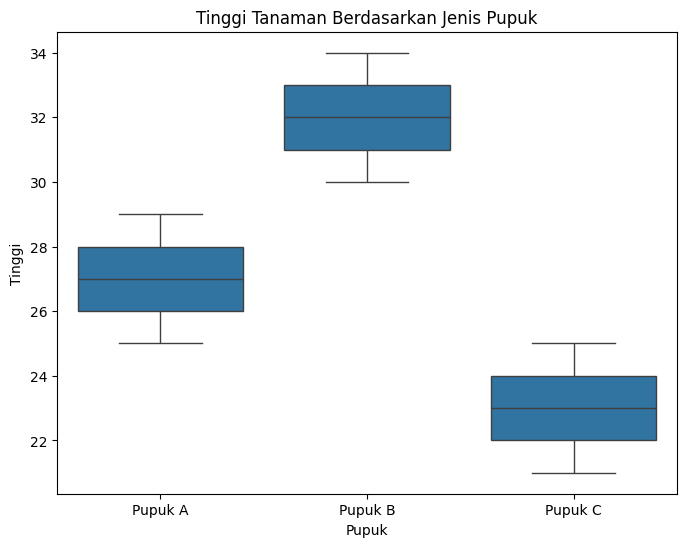

In [ ]:
data_pupuk = pupuk_a + pupuk_b + pupuk_c
kelompok_pupuk = ['Pupuk A']*5 + ['Pupuk B']*5 + ['Pupuk C']*5
df_pupuk = pd.DataFrame({'Tinggi': data_pupuk, 'Pupuk': kelompok_pupuk})
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pupuk', y='Tinggi', data=df_pupuk)
plt.title('Tinggi Tanaman Berdasarkan Jenis Pupuk')
plt.show()

#### ANOVA

In [ ]:
f_stat_pupuk, p_value_pupuk = stats.f_oneway(pupuk_a, pupuk_b, pupuk_c)
print(f"Studi Kasus 1 - Statistik F: {f_stat_pupuk}")
print(f"Studi Kasus 1 - P-value: {p_value_pupuk}")
if p_value_pupuk < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan dalam efektivitas pupuk.")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan dalam efektivitas pupuk.")

Studi Kasus 1 - Statistik F: 40.666666666666664
Studi Kasus 1 - P-value: 4.517173966629553e-06
Kesimpulan: Ada perbedaan signifikan dalam efektivitas pupuk.


### Studi Kasus 2: Pengaruh Metode Pengajaran terhadap Nilai Siswa

Masalah: Seorang guru ingin menguji apakah tiga metode pengajaran (Luring, Daring, Hibrid) memengaruhi nilai siswa.

In [ ]:
luring = [80, 82, 85, 78, 81]
daring = [75, 77, 74, 76, 78]
hibrid = [88, 90, 87, 89, 91]

#### Visualisasi

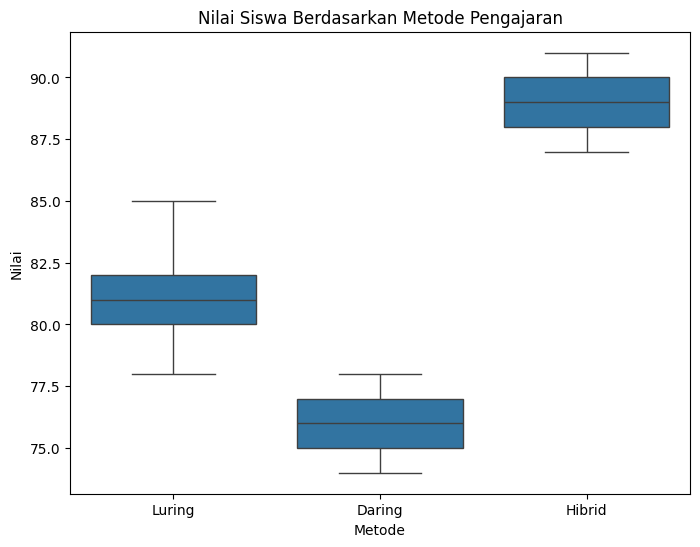

In [ ]:
data_nilai = luring + daring + hibrid
kelompok_nilai = ['Luring']*5 + ['Daring']*5 + ['Hibrid']*5
df_nilai = pd.DataFrame({'Nilai': data_nilai, 'Metode': kelompok_nilai})
plt.figure(figsize=(8, 6))
sns.boxplot(x='Metode', y='Nilai', data=df_nilai)
plt.title('Nilai Siswa Berdasarkan Metode Pengajaran')
plt.show()

#### ANOVA

In [ ]:
f_stat_nilai, p_value_nilai = stats.f_oneway(luring, daring, hibrid)
print(f"Studi Kasus 2 - Statistik F: {f_stat_nilai}")
print(f"Studi Kasus 2 - P-value: {p_value_nilai}")
if p_value_nilai < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan dalam nilai siswa berdasarkan metode pengajaran.")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan dalam nilai siswa berdasarkan metode pengajaran.")

Studi Kasus 2 - Statistik F: 54.88888888888874
Studi Kasus 2 - P-value: 9.155439730056927e-07
Kesimpulan: Ada perbedaan signifikan dalam nilai siswa berdasarkan metode pengajaran.


### Studi Kasus 3: Kepuasan Pelanggan di Cabang Restoran


Masalah: Seorang manajer restoran ingin tahu apakah ada perbedaan kepuasan pelanggan di tiga cabang (Cabang X, Y, Z).

In [ ]:
cabang_x = [4.2, 4.5, 4.3, 4.4, 4.1]  # Skala 1-5
cabang_y = [3.8, 3.9, 4.0, 3.7, 3.6]
cabang_z = [4.8, 4.7, 4.9, 4.6, 4.5]

#### Visualisasi

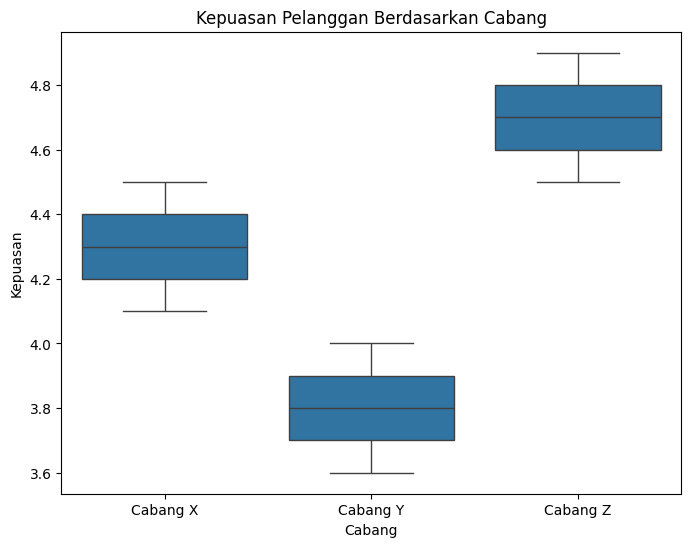

In [ ]:
data_kepuasan = cabang_x + cabang_y + cabang_z
kelompok_kepuasan = ['Cabang X']*5 + ['Cabang Y']*5 + ['Cabang Z']*5
df_kepuasan = pd.DataFrame({'Kepuasan': data_kepuasan, 'Cabang': kelompok_kepuasan})
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cabang', y='Kepuasan', data=df_kepuasan)
plt.title('Kepuasan Pelanggan Berdasarkan Cabang')
plt.show()

#### ANOVA

In [ ]:
f_stat_kepuasan, p_value_kepuasan = stats.f_oneway(cabang_x, cabang_y, cabang_z)
print(f"Studi Kasus 3 - Statistik F: {f_stat_kepuasan}")
print(f"Studi Kasus 3 - P-value: {p_value_kepuasan}")
if p_value_kepuasan < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan dalam kepuasan pelanggan antar cabang.")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan dalam kepuasan pelanggan antar cabang.")

Studi Kasus 3 - Statistik F: 40.66666666666663
Studi Kasus 3 - P-value: 4.51717396662957e-06
Kesimpulan: Ada perbedaan signifikan dalam kepuasan pelanggan antar cabang.


### Studi Kasus 4: Performa Algoritma Machine Learning


Masalah: Seorang data scientist ingin membandingkan akurasi tiga algoritma ML (KNN, SVM, Random Forest) pada dataset tertentu.

In [ ]:
knn = [0.85, 0.87, 0.86, 0.88, 0.84]
svm = [0.90, 0.91, 0.89, 0.92, 0.90]
rf = [0.87, 0.88, 0.86, 0.89, 0.85]

#### Visualisasi

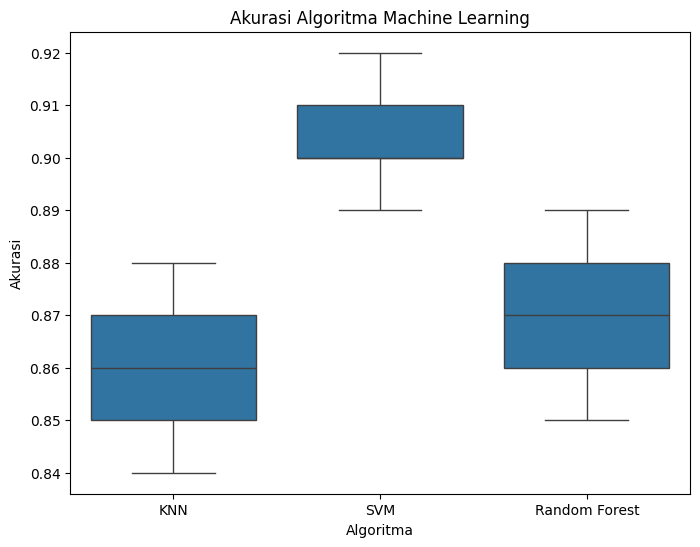

In [ ]:
data_akurasi = knn + svm + rf
kelompok_akurasi = ['KNN']*5 + ['SVM']*5 + ['Random Forest']*5
df_akurasi = pd.DataFrame({'Akurasi': data_akurasi, 'Algoritma': kelompok_akurasi})
plt.figure(figsize=(8, 6))
sns.boxplot(x='Algoritma', y='Akurasi', data=df_akurasi)
plt.title('Akurasi Algoritma Machine Learning')
plt.show()

#### ANOVA


In [ ]:
f_stat_akurasi, p_value_akurasi = stats.f_oneway(knn, svm, rf)
print(f"Studi Kasus 4 - Statistik F: {f_stat_akurasi}")
print(f"Studi Kasus 4 - P-value: {p_value_akurasi}")
if p_value_akurasi < 0.05:
    print("Kesimpulan: Ada perbedaan signifikan dalam performa algoritma.")
else:
    print("Kesimpulan: Tidak ada perbedaan signifikan dalam performa algoritma.")

Studi Kasus 4 - Statistik F: 12.66666666666667
Studi Kasus 4 - P-value: 0.0011028256754466656
Kesimpulan: Ada perbedaan signifikan dalam performa algoritma.
